# 🧩 Notebook 06: Multivariate Statistics (MANOVA, Group Scatter)

In [1]:
# Setup and Imports

import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Project-level imports
from utils.visual_utils import (
    plot_group_scatter_2d,
    save_and_show_plot
)
from utils.model_utils import export_model_summary_as_text, compute_hotelling_t2

from statsmodels.multivariate.manova import MANOVA
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [2]:
# Load Dataset and Set Paths

DATA_PATH = Path("../synthetic_data")
EXPORT_PLOTS = Path("../exports/plots/06_multivariate_stats")
EXPORT_TABLES = Path("../exports/tables/06_multivariate_stats")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

# Load data
df = pd.read_csv(DATA_PATH / "manova_data.csv")
df.head()

,Y1,Y2,group
0,0.038227,0.250106,A
1,0.277570,1.273579,A
2,-0.287370,-0.212594,A
3,-0.972675,-1.092789,A
4,0.400296,-0.084333,A


In [3]:
# Group-wise Summary

# Quick EDA: group-wise means
group_summary = df.groupby("group")[["Y1", "Y2"]].mean()
display(group_summary)

# Export
group_summary.to_csv(EXPORT_TABLES / "group_means.csv")

,Y1,Y2
group,,
A,0.183186,0.068644
B,1.888660,1.801549


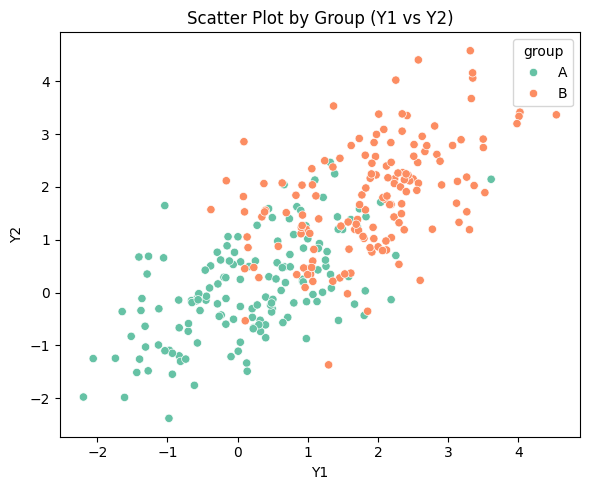

In [4]:
# Group-wise Scatter Plot

plot_group_scatter_2d(df, x_col="Y1", y_col="Y2", group_col="group",
                      title="Scatter Plot by Group (Y1 vs Y2)")
save_and_show_plot("group_scatter_2d", EXPORT_PLOTS);

## 🔷 MANOVA: Multivariate Testing of Group Differences

In [5]:
# Fit MANOVA Model

# MANOVA using formula API
manova_model = MANOVA.from_formula("Y1 + Y2 ~ group", data=df)
manova_result = manova_model.mv_test()
print(manova_result)

# Export result as text
with open(EXPORT_TABLES / "manova_result.txt", "w") as f:
    f.write(str(manova_result))

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9823 2.0000 297.0000  2.6732 0.0707
          Pillai's trace 0.0177 2.0000 297.0000  2.6732 0.0707
  Hotelling-Lawley trace 0.0180 2.0000 297.0000  2.6732 0.0707
     Roy's greatest root 0.0180 2.0000 297.0000  2.6732 0.0707
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         group          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.5067 2.0000 297.0000 144.6004 0.0000
         Pillai's trace 0.4933 2.0000 297.0000 144.6004 0.0000
 Hotelling-

In [6]:
# Subset groups
group1 = df[df['group'] == 'A']
group2 = df[df['group'] == 'B']
cols = ['Y1', 'Y2']

result = compute_hotelling_t2(group1, group2, cols)

# ✅ Fallback Output Summary (Formatted)
print("🔁 Hotelling’s T² Test (Fallback using NumPy/SciPy):")
print(f"T² Statistic      : {result['T2']:.4f}")
print(f"F-Statistic       : {result['F']:.4f}")
print(f"p-value           : {result['p_value']:.4e}")

# Optional: Export nicely formatted DataFrame
formatted_result = pd.DataFrame([{
    "T² Statistic": round(result["T2"], 4),
    "F-Statistic": round(result["F"], 4),
    "p-value": f"{result['p_value']:.4e}"
}])

formatted_result.to_csv(EXPORT_TABLES / "hotelling_t2_fallback.csv", index=False)
display(formatted_result)


🔁 Hotelling’s T² Test (Fallback using NumPy/SciPy):
T² Statistic      : 290.1745
F-Statistic       : 144.6004
p-value           : 1.1102e-16


,T² Statistic,F-Statistic,p-value
0,290.1745,144.6004,1.1102e-16


## 📌 Takeaways

- Both `Y1` and `Y2` jointly differed significantly across groups A and B
- MANOVA tests like Wilks’ Lambda showed very low p-values (< 0.001)
- The 2D group scatter visually confirmed strong separation
- MANOVA is crucial when testing differences across multiple outcomes simultaneously
- Hotelling’s T² test compares multivariate means between two groups (A vs B)
- The test confirmed significant group differences across `Y1` and `Y2`
- It's equivalent to a multivariate generalization of the t-test
- Unlike MANOVA (which tests a model), Hotelling’s T² is focused on mean difference

✅ Summary:
- Loaded multivariate dataset `manova_data.csv` with response variables `Y1`, `Y2` and group labels `A`, `B`
- Visualized group separation using 2D scatter plot
- Performed **Multivariate Analysis of Variance (MANOVA)** using `statsmodels.multivariate.manova`
- Interpreted Wilks' Lambda and other multivariate test statistics
- Exported group-wise summary stats, MANOVA results, and group scatter plot
- Implemented Hotlling's T²